# Introduction

**Boston University** \
**BITLAB** \
**Professor: Dokyun Lee** \
**Notebook Author: Hamid Nemati** \
(*November, 2024*)


Previously, I have prepared a report on Different LLM-based MAS tools and **LangGraph**, **AutoGen**, and **Taskweaver** came on top. **CrewAI** is also growing fast and many people like it because of its simplicity. Also recently another framework called **Magentic-One** got released which worth looking into.

In this notebook we dive deeper to find optimal organization of the agents. This is a big question to answer so break to to smaller step. First we try to build all possible organizations with these tools and find out which one is more flexible to carry out the rest of out test and trials. After Choosing the right tool We try to employ this in different organizations for some toy problms and compare them. We will use any paper we can get our hands on in order to not reinvent the wheel.




## Summary of What We Already Covered.

1. **LangGraph**

> LangGraph is a specialized framework for creating advanced multi-agent systems with cyclical, stateful workflows. Compared to LangChain, LangGraph provides more detailed control over how agents interact, communicate, and perform iterative tasks. Its graph-based structure enables dynamic decision-making and multi-step reasoning, making it particularly suitable for scenarios requiring repeated agent collaboration.
>
> Key Features:
>
> > Stateful Multi-Agent Applications: LangGraph supports long-term collaboration where agents maintain state over multiple interactions.
> >
> > Cyclical Computation: It allows for iterative processes where agents refine their outputs through continuous interaction.
> >
> > Fine-Grained Control: It offers greater control over agent behavior and interactions, ideal for complex, custom-built systems.
>
> LangGraph shines in applications requiring robust, cyclical workflows where agents need to collaborate and review each other’s outputs continuously. While tools like AutoGen and CrewAI excel in different areas, LangGraph offers more detailed agent orchestration through graphical representations.


2. **AutoGen**

> Released by Microsoft in September 2023, AutoGen is a flexible, open-source framework for defining and orchestrating AI agents with minimal coding. Its low-code interface, AutoGen Studio, offers pre-defined agents that can be easily configured into teams (workflows). These agents integrate with LLMs, tools, and human feedback, making AutoGen suitable for diverse applications like personal finance management and learning assistance.
>
> Key Features:
>
> > Customizable Agents: Highly flexible, with support for various models, including OpenAI and Azure models.
> >
> > Rich Examples and Transparency: Developers can review task outputs, costs, and internal monologues of workflows for insights.
> >
> > Modularity: Integrates easily with additional libraries, such as Llama-Index, for tool augmentation.
>
> AutoGen is an excellent choice for applications requiring dynamic agent collaboration, though its flexibility can make it less structured for highly controlled environments. Despite being newer than LangChain, AutoGen has rapidly gained traction due to its extensive community support and robust performance in LLM orchestration.

3. **TaskWeaver**

> TaskWeaver, also developed by Microsoft, was created to address limitations in AutoGen by providing more precise control and advanced orchestration for complex, interconnected multi-agent workflows. It is a code-first framework, meaning developers directly interact with the system through programming rather than using visual interfaces.
>
> Key Features:
>
> > Modular Design: Decomposes tasks into smaller subtasks, which can be executed independently by different LLMs.
> >
> > Declarative Specification: Tasks are defined based on desired outcomes, allowing dynamic execution plans.
> >     
> > Fault Tolerance and Scalability: Handles errors and ensures scalability for enterprise-level applications and AI research.
>
> While AutoGen focuses on flexibility and ease of use, TaskWeaver prioritizes precise control, making it ideal for large-scale, complex projects. It integrates domain-specific knowledge and supports secure code execution, giving developers the ability to manage intricate multi-agent systems with tight control.

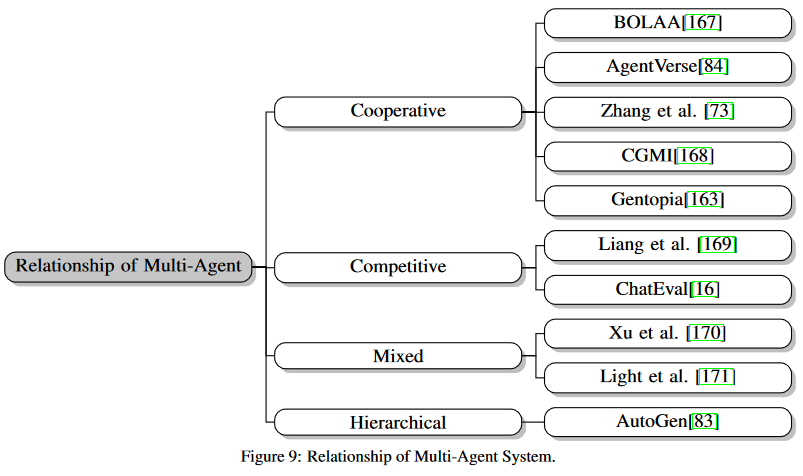

# LLMs

Given that the task is sufficiently complex, no single pipeline generates correct solutions for all possible task instances. One thus must learn how to construct individual expert pipelines for individual task instances in order to maximize the number of correct solutions.

**First, the correct pipeline must be discovered, then it should be correctly executed.** To discover this pipeline we need **REASONING**.

We have all heard that LLMs are good at reasoning tasks. Let's go deeper on that since it will be essential to the answer we are trying to find.

Mathematical reasoning refers to the cognitive process of utilizing logical thinking to solve mathematical problems. It involves the use of abstract, deductive, and inductive reasoning skills, and is often structured in the following ways:

1. **Deductive Reasoning**: Starting from general rules and principles, and deducing specific conclusions. It’s a top-down approach where you begin with a known truth and apply it to specific cases. In mathematics, this is often seen in theorems and proofs. For example, knowing that all right-angled triangles obey Pythagoras’ theorem, one can deduce the length of a side of a specific right-angled triangle.

2. **Inductive Reasoning**: Beginning with specific observations or cases and generalizing them to a broader rule or principle. This is a bottom-up approach, where patterns or regularities are observed and then generalized. For instance, observing that the sum of the angles in several specific triangles is always 180 degrees and generalizing this as a rule for all triangles.

3. **Abductive Reasoning**: This involves starting with an observation and then seeking the simplest and most likely explanation. In mathematics, this might involve finding the most probable solution to a problem based on the given data

4. **Analogical Reasoning**: Applying knowledge or solutions from one area of mathematics to another area to solve problems. This might involve recognizing that the structure of one mathematical problem is similar to another and that the solution of one can guide the solution of the other.

5. **Algorithmic Thinking**: Involves following a step-by-step procedure or set of rules to solve a problem. This is fundamental in computational mathematics and areas that involve complex problem-solving.

LLMs still struggle with most of these reasonings, but the most important one to us is algorithmic reasoning problems, since it can break down the complex problem in to simpler sub-problems, so we can solve them with our agents.

In order to have better algorithmic thinking some papers suggest this: Dynamic learning process, like what we have in RL, allows models to adjust their strategies based on the outcomes of their reasoning steps, which is crucial for multi-step reasoning tasks.



Below, we can see results of financial-related reasonings:

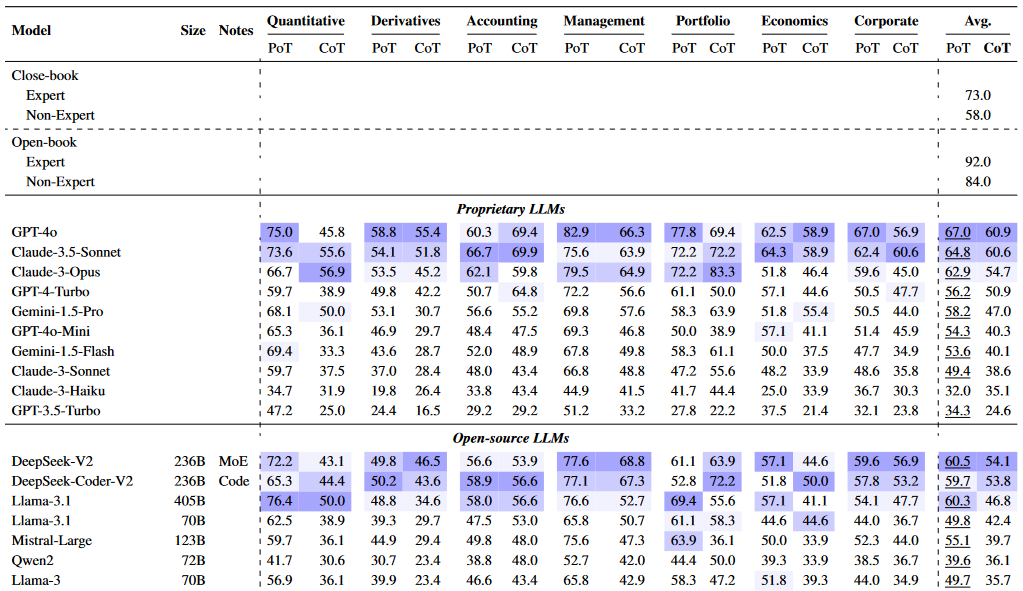

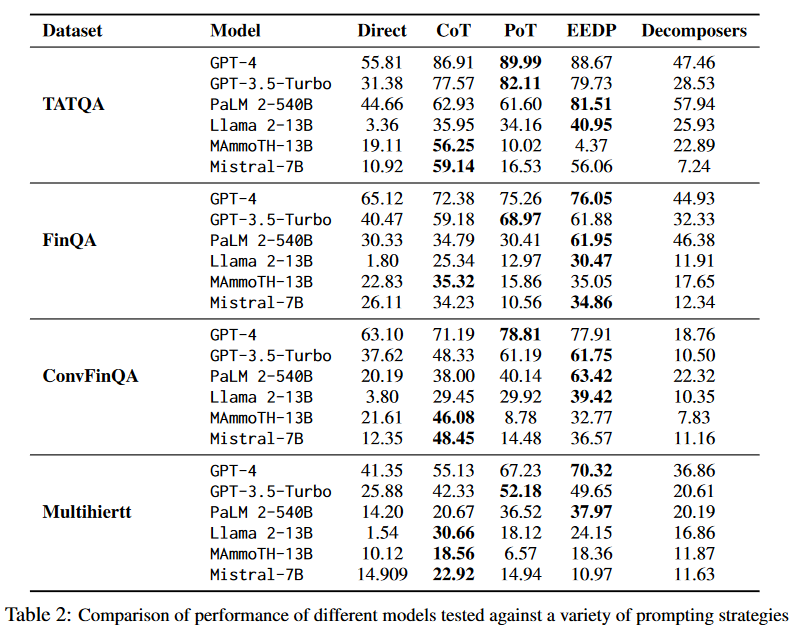

# Multi Agent Systems

## Notes

_____

**Distributed Artificial Intelligence (DAI)** algorithms are classified into three categories, based on the fundamental methods used to solve the tasks, namely:
  1. **parallel AI**: Involves developing parallel algorithms, languages, and architectures for increasing the efficiency of classical AI algorithms by leveraging task parallelism

  2. **Distributed Problem Solving (DPS)**: Involves dividing a task into subtasks each of which is allocated to a node among a set of coopera tive nodes, known as computing entities. Computing entities have shared knowledge or resources as well as predefined communications with other entities which in turn limits their flexibility.

  3. **Multi-Agent Systems (MAS)**: Similarly to computing entities in DPS, agents collaboratively solve tasks yet they offer more flexibility due to their inherent ability to learn and make autonomous decisions. A MAS can be categorized by its features:

    1. **LEADERSHIP**: Leader-follower or leaderless.
    2. **DECISION FUNCTION**: Linear or non-linear.
    3. **HETEROGENEITY**: Homogeneous and heterogeneous.
    4. **AGREEMENT PARAMETERS**: First order, second order, and high-order MAS.
    5. **DELAY CONSIDERATION**: with delay or without delay.
    6. **TOPOLOGY**: static or dynamic.
    7. **DATA TRANSMISSION FREQUENCY**: time-triggered or an event-triggered.
    
_____

More on MAS Components:

* **Goal**: generate optimal and suboptimal sequences of actions

* Properties: Perception, reasoning, learning, decision making, problem solving, interaction, and communication

* Agent
  * simple reflex agent: react to current sensory input only
  * model-based reflex agents:  keep an internal state of the environment
  * goal-based agents:  perform actions that lead to accomplishing their goals
  * utility-based agents: maximize their utility

* Interactions

  * Positive
    * collective: agents are unaware of other agents’ existence but share a common goal and each agent contributes to its completion
    * cooperative: similar to collective interaction except that agents are aware of other agents’ existence
    * collaborative: agents do not have common goals but help each other accomplish their individual goals
    * coordinative: agents within an environment work together to minimize interference and complete their individual goals

  * Negative
    * conflicting: agents do not have enough resources to complete their goals and fight for external resources.
    * competitive: agents have conflicting goals.

* Decision making
  * episodic: the output is a single action
  * sequential: the output is a sequence of actions or policy

* Learning
  * centralized: one learner learns policies for all agents in the system
  * decentralized: each agent learns its own policies in parallel to other agents

* Hyper-parameters:
  * horizon: finite or infinite
  * Credit assignment: how to distribute rewards among cooperating agents
  * Communication: direct or indirect

* Decision making models:
  * Markov decision processes
  * game theory
  * swarm intelligence
  * graph theory
  * control theort

* **Algorithms**:
  * reinforcement learning
  * dynamic programming
  * evolutionary computing
  * neural networks
  * **LLMs**



_____

MAS challenges are:

* **Scalability**: to accomplish more complex tasks

* **Computational Complexity**: computationally efficient due to the need for real-time decision making in some applications or the lack of enough computational resources of agents.

* **Dynamic Environments**: The environment's dynamic and unpredictable nature makes it difficult to foresee, design and test an agent that can handle all these situations. **Bayesian games** are better suited to handle uncertain-
ties than MDP and its variants that assume fully observable environment.

* **System Heterogeneity**: Heterogeneous MAS can deal with environment diversity and complex tasks. However, this heterogeneity makes cooperative decision making more complex: agents need to model other agents when capability uncertainty exists, agent capabilities should be compatible, and agents should have a common language.

* **Big Data**: Utilizing big data can benefit MAS. But how can we feed this information to computationally limited agents or decision making algorithms whose computational cost grows exponentially with the dimensionality of the data?

* **Evaluation Standards**

* **COORDINATION CONTROL**
    * CONSENSUS
    * CONTROLLABILITY
    * SYNCHRONIZATION
    * CONNECTIVITY
    * FORMATION

* **LEARNING**:

* **FAULT DETECTION**:

* **TASK ALLOCATION**:

* **SECURITY**:

* **AGENT ORGANIZATION**:
  * Flat
  * Hierarchical
  * Holonic
  * Coalition
  * Team
  * Matrix
  * Congregation

_____

Future works of recent surveys:

* multi-goal learning where each agent has an individually associated goal that needs to be optimized
* Limited research has been conducted in heterogeneous scenarios, although many real-world problems naturally comprise a mixture of different entities.
* The fundamental problem in the multi-agent domain is and ever has been the curse of dimensionality.
* non-stationarity, partial observability, and coordination, Learning communication, credit assignment problem
* Knowledge reuse, parameter sharing, transfer learning, curriculum learning regularization, self-play, adversarial training
* Distributed training vs Centralized training
* Emergent patterns of agent behavior

_____


MAS offers better decision making in more complex environments but it comes at a cost :)

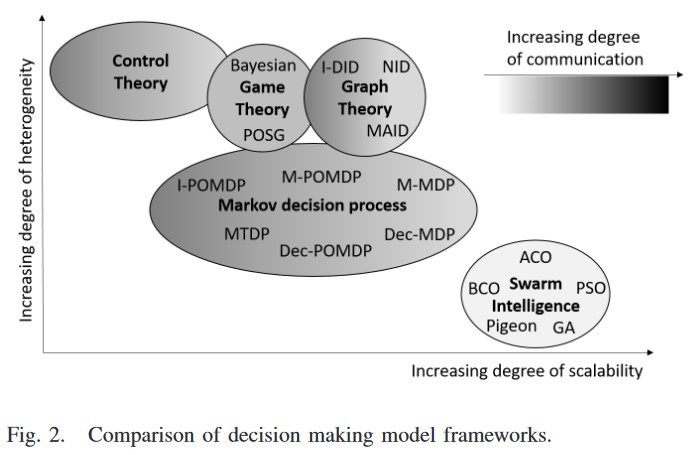
_____

Some papers compared MAS with expert systems and object-oriented programming language, two concepts that also involve decision making and sharing of knowledge.

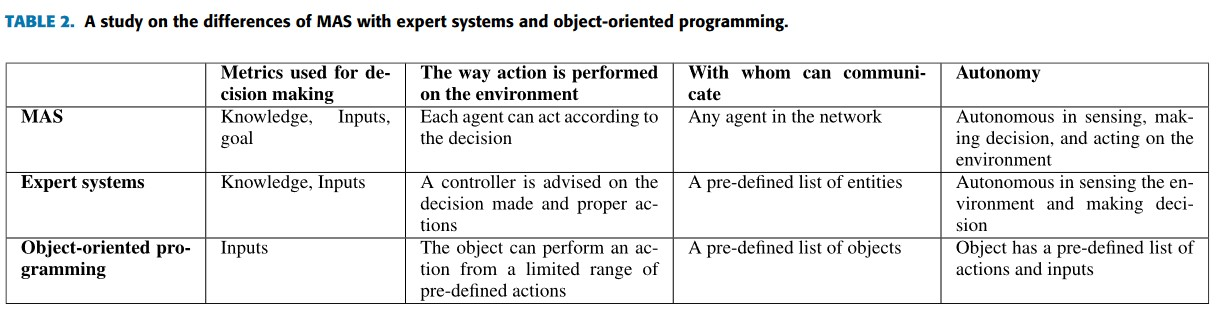

_____


**MAS Architectures** can be categorized as:

* Sequential: Agents perform tasks in a predetermined order, where each step
  depends on the completion of the previous one.
* Hierarchical: Agents follow a structured hierarchy, with higher-level agents
  overseeing and coordinating the activities of lower-level agents.
* Asynchronous: Agents operate independently, handling tasks as they arise
  without adhering to a fixed sequence, allowing for flexibility and parallel pro-
  cessing.

____________
**Agent Architecture** can be categorized as:

* Reactive Agents: Operate on a stimulus-response basis without maintaining
an internal state. Suitable for dynamic environments but limited in handling
complex tasks.
* Deliberative Agents: Use an internal model of the environment to plan
actions, capable of reasoning and long-term planning, but require higher com-
putational resources.
* Hybrid Agents: Combine elements of both reactive and deliberative archi-
tectures, balancing responsiveness and strategic capability.

____________

**Effective Agent Communication** can be categorized as:

* Coordination: Ensures agents’ actions are aligned toward the system’s ob-
jectives.
* Cooperation: Enables agents to share resources and collaborate on tasks.
* Negotiation: Helps resolve conflicts in competitive or resource-constrained
environments.
* Information Sharing: Enhances decision-making by sharing information
about the environment and agents’ internal states.

___________


## **Fundamental Organizations**

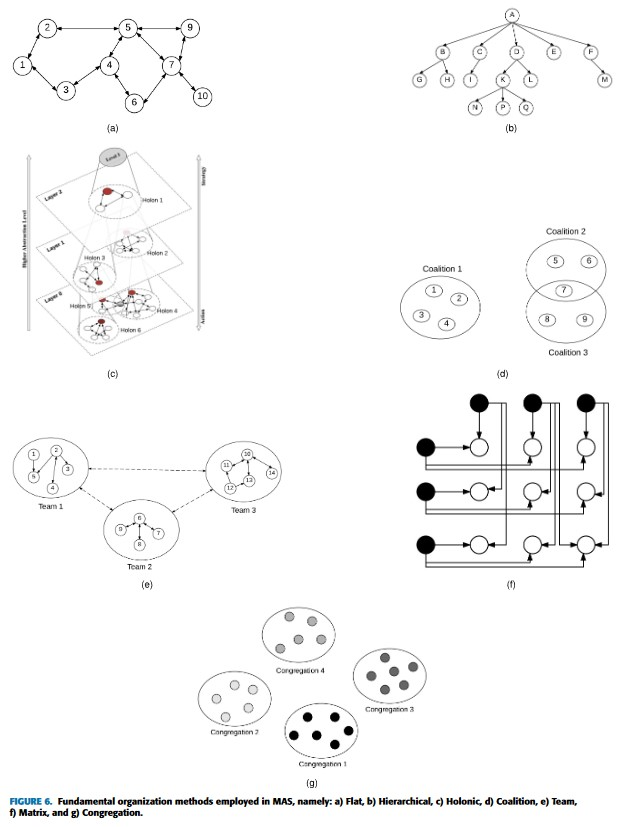

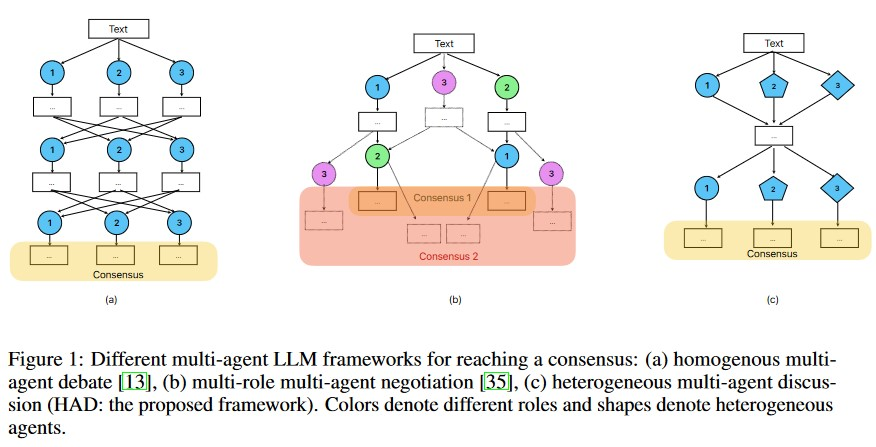
_____

# A closer look

**What Is an Organizational Structure in Real World (Companies)?**

Sources:
* https://www.lucidchart.com/blog/types-of-organizational-structures

* https://www.indeed.com/career-advice/career-development/types-of-organizational-structures

* https://www.investopedia.com/terms/o/organizational-structure.asp

An organizational structure is a system that outlines how certain activities are directed to achieve the goals of an organization. These activities can include **rules**, **roles**, and **responsibilities**.

**The organizational structure also determines how information flows between levels within the company.** Decisions flow from the top down in a centralized structure. Decision-making power is distributed among various levels of the organization in a decentralized structure. Having an organizational structure in place allows companies to remain efficient and focused.


An organizational structure outlines how certain activities are directed to achieve the goals of an organization.

A centralized structure has a defined chain of command. Decentralized structures give almost every employee a high level of personal agency.

Types of organizational structures include functional, divisional, flatarchy, and matrix structures.

Senior leaders should consider a variety of factors including the business's goals, industry, and culture before deciding which type of organization is best for their businesses.

________________
Centralized
* chain of command
* very clear responsibilities for each role
* subordinate roles defaulting to the guidance of their superiors

Decentralized
* More people play a role in decision-making with a decentralized organizational
* fast, agile, and adaptable with everyone able to throw ideas around.

_______________
Types
* Functional: breaks up a company based on the specialization of its workforce
  * Most small-to-medium-sized businesses implement a functional structure.

* Divisional or Multidivisional: structures itself so each business unit operates as its own company with its own president.
  * This type is common among large companies with many business units.
  * A company that uses this method structures its leadership team based on the products, projects, or subsidiaries it operates.

* Team-Based: Team-based organizations segregate into close-knit teams of employees that serve particular goals and functions, similar to divisional or functional structures. Each team is a unit that contains both leaders and workers, however.

* Flat: also known as a horizontal structure, is used among many startups. It flattens the hierarchy and chain of command as the name implies. It gives its employees a great deal of autonomy. Companies that use this type of structure have a high speed of implementation.

* Matrix: This is the most confusing and the least used. It matrixes employees across different superiors, divisions, or departments. An employee working for a matrixed company may have duties in both sales and customer service.

* Circular Structure: Circular structures are hierarchical. Organizing this way is intended to encourage open communication and collaboration among the ranks.

* Network: The network structure organizes contractors and third-party vendors to carry out certain key functions. It features a relatively small headquarters with geographically dispersed satellite offices along with key functions outsourced to other firms and consultants.

* Process-based: this structure outlines services from left to right. An executive at the top of the structure oversees the departments. each process cannot start until the one before it has finished. Each department or team has its own management.
_____________

Based on the structures listed, a **team-based** or **network structure** would likely be most effective for a Large Language Model (LLM)-based multi-agent system. These structures emphasize collaboration, adaptability, and resource sharing across agents, essential for dynamic, context-aware environments like LLM-driven systems. The team-based structure fosters flexibility, enabling agents to tackle specific tasks in groups. Alternatively, a network structure supports interconnectedness and resource-sharing, which can streamline communication and task execution across multiple specialized agents, making the system agile and scalable.

AutoGen and TaskWeaver are both multi-agent frameworks that facilitate the delegation, orchestration, and management of tasks between agents. However, AutoGen is more sophisticated in handling advanced natural language processing (NLP), dynamic agent interactions, and complex agent roles, while TaskWeaver focuses on efficient task management and dependency modeling. Here are some key scenarios where AutoGen excels and TaskWeaver may fall short:

1. Dynamic Multi-Agent Communication

  Scenario: A team of agents needs to handle a dynamic conversation between a user and multiple specialized agents, responding to different types of queries and adjusting based on the conversation’s context (like customer service chatbots or multi-agent dialogue systems).

  * AutoGen: Can support interactive, dynamic communication between agents in real time. For example, in a chatbot setup, AutoGen allows agents to hold and evolve a conversation where each agent responds based on specialized roles (e.g., an agent handling logistics, another handling payments).

      * AutoGen Component: The GroupChat and AssistantAgent functionalities support conversational threads with multiple agents coordinating tasks and responding to user queries in a dialogue-like manner.

  * TaskWeaver: TaskWeaver is primarily task-driven and does not specialize in real-time, dynamic conversations. It is better suited for predefined tasks with dependencies but cannot natively support ongoing, evolving conversations between multiple agents.

2. Retrieval-Augmented Generation (RAG)

  Scenario: A system that integrates external knowledge retrieval into agent actions, such as searching for specific information in a knowledge base before generating a response or task result.

  * AutoGen: Supports Retrieval-Augmented Generation (RAG), where agents can retrieve external data (e.g., through search queries or APIs) and incorporate that into their decision-making process. This is useful in scenarios like legal document analysis, where agents must gather information and then generate a response.

      * AutoGen Component: The RetrieveUserProxyAgent or integration with large language models (LLMs) that are capable of reasoning and retrieving knowledge.

  * TaskWeaver: TaskWeaver does not natively support retrieval mechanisms. Tasks need to be defined in advance without dynamically querying or generating knowledge from external resources. It focuses more on the task flow rather than knowledge-based interaction.

3. Complex Role Assignment & Adaptive Agents

  Scenario: A virtual software company where each agent has a predefined role (CEO, CTO, programmer, tester) and dynamically assigns tasks based on real-time requirements and role expertise.

  * AutoGen: Allows for task-specific role assignment and adaptability of agent behavior based on their role in a team. Each agent can autonomously select tasks, negotiate responsibilities, and collaborate based on context. For example, in the ChatDEV environment, agents dynamically take on roles such as programmers or testers, adjusting their actions based on project needs.
      * AutoGen Component: Systems like GroupChatManager and role-specific agents allow adaptive coordination, where agents can reassign roles dynamically.

  * TaskWeaver: Although TaskWeaver can assign tasks, it lacks the concept of complex, evolving roles with different expertise. Agents are not designed to negotiate or dynamically adapt their responsibilities based on real-time conditions.

4. Multi-modal Agent Interactions

  Scenario: A multi-agent system designed to handle different modalities (e.g., images, text, and audio) and make decisions based on multi-modal inputs.

  * AutoGen: Supports multi-modal inputs where agents can interpret and reason about different types of data (e.g., visual data, textual descriptions, or audio commands) to make decisions. This would be essential in scenarios like a digital assistant that processes images (e.g., document scanning) along with text-based queries.

      * AutoGen Component: AutoGen has provisions for multi-modal reasoning and interaction between agents, allowing them to work with various data types in the decision-making process.

  * TaskWeaver: TaskWeaver is limited to task and workflow execution in a mostly homogeneous task environment (i.e., primarily computational and text-driven tasks). Multi-modal support is beyond its core capabilities.

5. Complex Task Chaining with Feedback Loops

  Scenario: A complex system where agents require multiple iterations to refine their outputs based on feedback from other agents or external systems. For example, in an iterative design process, feedback from a tester agent needs to inform changes made by a development agent.

  * AutoGen: Supports feedback loops where agents refine their behavior based on real-time inputs and collaboration between agents. This is useful in iterative systems like software development or legal review, where tasks require multiple stages of refinement.

      * AutoGen Component: The GroupChat framework allows agents to iteratively improve their outputs based on collective feedback and discussion.

  * TaskWeaver: TaskWeaver is designed for efficient task distribution and dependencies but does not support multi-step iterative processes with feedback loops. Once tasks are executed, they are considered complete without the possibility of refinement based on dynamic feedback.

6. Handling Ambiguous or Open-ended Tasks

  Scenario: Agents must reason and respond to ambiguous or vague instructions from users, interpreting context and generating possible solutions (e.g., an AI assistant interpreting a user's incomplete request).

  * AutoGen: AutoGen agents, particularly those integrating with large language models (LLMs), can handle open-ended or ambiguous instructions, where they interpret incomplete tasks and use reasoning to generate appropriate responses.

      * AutoGen Component: LLMs and conversational agents are designed to handle fuzzy inputs and generate context-aware responses.

  * TaskWeaver: Tasks in TaskWeaver are predefined and explicit. Ambiguous tasks cannot be handled effectively as TaskWeaver lacks the capability for natural language understanding or inference-based task execution.


**Summary: AutoGen excels in scenarios requiring dynamic, adaptive agents that interact via real-time conversation, retrieve external knowledge, handle multi-modal data, and work in iterative, feedback-driven environments.**


Here are scenarios that TaskWeaver can handle better than AutoGen or where AutoGen's capabilities do not directly apply:

1. Highly Complex Task Dependency Modeling

  Scenario: You need to manage a highly complex task with intricate dependencies across many subtasks. This scenario might involve a project with numerous subtasks that must execute in a very specific sequence, with some tasks requiring results from multiple other tasks (dependency-driven execution).

  * TaskWeaver: Specifically designed for this kind of detailed task orchestration. It can handle highly intricate dependency chains, ensuring tasks are executed in the correct order based on the completion of other related tasks. TaskWeaver excels at managing task networks where specific subtask outcomes directly impact downstream operations.

      * TaskWeaver Feature: The system allows for fine-grained control over task dependencies and ensures that all preconditions are met before starting a task.

  * AutoGen: AutoGen is more about collaboration between agents and dynamic task execution rather than explicit dependency modeling. While it can manage workflows, it is not designed for extensive, complex task dependency trees like TaskWeaver.

2. Parallel Task Execution with Dependency Awareness

  Scenario: Managing multiple tasks in parallel, where the results of some tasks need to be collected or merged into another task (e.g., when building software, compiling different modules in parallel, then linking them).

  * TaskWeaver: Built for handling parallel execution of tasks efficiently with dependency awareness. TaskWeaver will ensure that parallel tasks are executed in a synchronized manner, with dependencies being respected.
    
    * TaskWeaver Feature: Handles concurrency and parallelism efficiently, especially when tasks need to merge results for further processing.
    
  *  AutoGen: AutoGen can manage agents performing tasks, but it's not specifically optimized for parallel task execution with intricate dependencies. AutoGen lacks built-in mechanisms for detailed parallel task execution management, making it less efficient in highly parallelized, dependency-sensitive environments.

3. Resource-Constrained Task Scheduling

  Scenario: Scheduling tasks when resources (like CPU time, memory, or specific computing resources) are limited and need to be carefully allocated across different subtasks.

  * TaskWeaver: Can manage resource constraints efficiently, making it a great solution for scenarios where resource allocation must be carefully managed among various tasks. TaskWeaver can queue tasks or adjust priorities based on available resources.

      * TaskWeaver Feature: Handles resource-aware scheduling, ensuring that tasks are optimized for the available hardware or computational resources.
  
  * AutoGen: While AutoGen focuses on task management, agent collaboration, and NLP-related tasks, it is not designed to handle resource-constrained scheduling. AutoGen's primary purpose is to orchestrate agent collaboration, not to optimize for limited hardware or computational resources.

4. Detailed Failure Recovery and Fault Tolerance

  Scenario: A scenario where task failures are likely (e.g., in a distributed system) and you need robust mechanisms for automatic retries, failure logging, or fault tolerance to ensure eventual task completion.

  * TaskWeaver: Has built-in features for handling failures, retries, and rolling back dependencies when tasks fail. It can handle complex workflows where a single failure needs to trigger a chain of recovery actions or rollback processes.
        
      * TaskWeaver Feature: Robust fault-tolerance and automatic retries allow it to recover gracefully from errors during task execution, ensuring that failure does not halt the entire workflow.

  * AutoGen: AutoGen can handle some failures in agent collaboration, but it is not designed for the rigorous fault-tolerant mechanisms you would see in systems like TaskWeaver. AutoGen's focus is on adaptive agent collaboration rather than explicit failure handling in highly structured tasks.

5. Real-Time Scheduling and Task Prioritization

  Scenario: A factory needs to dynamically adjust task priorities based on real-time data, such as sensor readings, to ensure tasks are processed in an optimal order.

  * TaskWeaver: Can manage real-time task prioritization, dynamically adjusting which tasks take precedence based on real-time inputs or changes in the environment. It excels in dynamic scheduling environments where priorities shift frequently and tasks need to be rescheduled efficiently.

      * TaskWeaver Feature: Provides real-time scheduling capabilities, allowing for tasks to be dynamically ordered and reordered based on real-time input.

  * AutoGen: While AutoGen can adapt agent behavior based on real-time interaction, it is not optimized for real-time task scheduling and prioritization in a resource-constrained environment. AutoGen’s focus is more on adaptive, high-level agent interactions rather than low-level task scheduling.

6. Long-Running Task Pipelines with Checkpoints

  Scenario: A system processing large amounts of data that require tasks to execute over long periods with intermediate checkpoints to ensure that progress is saved, and tasks can be resumed in case of failure.

  *  TaskWeaver: Designed to handle long-running tasks with checkpointing mechanisms. This ensures that tasks that need to run for extended periods can save their state, recover from interruptions, and resume without restarting from scratch.
        
      * TaskWeaver Feature: Support for checkpointing allows for long-running, data-heavy tasks to be handled efficiently with minimal downtime.
    
  * AutoGen: AutoGen is more focused on real-time and conversational task management rather than long-running computational tasks with stateful checkpoints. While AutoGen can manage workflows, it is not optimized for long-running task pipelines with intermediate checkpoints.

7. Batch Task Processing

  Scenario: Processing multiple independent or semi-independent tasks in bulk, such as generating reports for thousands of customers at once or processing multiple large datasets in parallel.

  * TaskWeaver: Capable of handling batch processing of tasks efficiently. It is designed to process multiple jobs simultaneously, optimizing for batch execution while respecting task dependencies.

      * TaskWeaver Feature: Excellent for use cases where you need to process many tasks together in an efficient manner.
    
  * AutoGen: AutoGen is more focused on managing collaborative, dynamic task execution between agents rather than bulk batch processing. While it can handle multiple tasks, it is not optimized for the kind of bulk parallel processing TaskWeaver specializes in.

**Summary: TaskWeaver's strengths lie in structured, resource-optimized, and fault-tolerant task scheduling**


**Based on We have learned so far, TaskWeaver is more similar to LangGraph than AutoGen.** Both frameworks excel in task orchestration and dependency management in multi-agent systems. However, there are some differences in how they handle task execution, agent communication, and adaptability. Below is a comparison that highlights things TaskWeaver can do that LangGraph may struggle with or not support natively.

______
**TaskWeaver Strengths Over LangGraph:**

1. Dynamic Dependency Chains:

      **TaskWeaver:** Allows for dynamically changing task dependencies during execution, where task outcomes can alter subsequent task paths. This is particularly useful for workflows that must adapt based on real-time results, like when a task produces unexpected output that must be handled by a different task than originally planned.
        
      **LangGraph:** Primarily focuses on pre-defined, static task flows. Once the graph of tasks is set up, it’s hard to dynamically alter the dependencies or task paths based on live outcomes during execution. LangGraph expects a clear, static dependency graph from the start.

2. Task Scheduling and Workflow Prioritization:
    
      **TaskWeaver:** Has built-in mechanisms for prioritizing tasks and dynamically scheduling them, which is ideal in scenarios like CI/CD pipelines where certain tasks need to be prioritized over others or in a distributed system where resources are scarce, and tasks need to be sequenced based on importance or availability.
      
      **LangGraph:** Focuses more on the execution of predefined tasks in a static sequence and lacks extensive task prioritization or scheduling built into the framework. Tasks are processed in the order they appear in the graph, without much flexibility for dynamic reordering based on priority.

3. Role-Specific Agents:

      **TaskWeaver:** Allows for the assignment of specific roles to agents that can change dynamically depending on task needs. For example, agents can negotiate roles during task execution, where one agent might take on different responsibilities depending on the state of the workflow. This role assignment is particularly useful in collaborative environments.
        
      **LangGraph:** Does not have built-in support for role-specific agents that change dynamically. While it can organize agents for tasks based on the graph structure, it doesn’t support real-time role negotiation or dynamic role adaptation.

4. Real-Time Feedback Loops:

      **TaskWeaver:** Supports iterative processes where tasks can generate feedback that influences future task executions. This feature is vital in scenarios like iterative machine learning models, where outputs are constantly refined based on feedback from validation results.
        
      **LangGraph:** Focuses on completing tasks in a one-pass sequence. Once a task finishes, the graph moves forward, and it doesn't naturally support iterative loops without manually modifying the graph structure.

5. Support for Long-Running Processes:

      **TaskWeaver:** TaskWeaver is more flexible when it comes to managing long-running tasks. It is equipped with tools to monitor tasks over extended periods, which makes it suitable for distributed systems or projects like DevOps pipelines that require continuous integration or testing processes.
      
      **LangGraph:** Primarily designed for short-term task execution. It doesn’t natively manage long-running processes that require persistence over time or across sessions.

____

**Areas Where LangGraph Excels (Counterbalance):** Although TaskWeaver excels in dynamic task management and role adaptability, LangGraph offers some distinct advantages:

  * Simpler, more intuitive for static workflows: If you have a task pipeline that doesn't need dynamic reorganization or real-time adjustments, LangGraph's simplicity can be a strength.
    
  * Easier integration with Python-based environments: LangGraph’s design is Python-friendly, with clearer APIs for setting up tasks in small to medium-sized projects without complex multi-agent interactions.
____